# LIST 2

Model fitting and data analysis exercises.

> For more information on the dataset and the underlying study, please visit [this link](http://www.scielo.br/pdf/abc/2015nahead/0066-782X-abc-20150089.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
# from sklearn import linear_model

%matplotlib inline

In [2]:
df = pd.read_csv("../data/medical-data.csv",sep=";").astype(float)
df.columns = ['idade','peso','carga_final','vo2_max']
df.describe()

,idade,peso,carga_final,vo2_max
count,1172.000000,1172.000000,1172.000000,1172.000000
mean,53.290956,85.925776,172.271502,140.631503
std,14.746297,14.799113,70.093124,1973.597226
min,18.000000,45.300000,30.000000,5.846847
25%,42.000000,76.100000,120.000000,21.799827
50%,54.000000,83.700000,170.000000,28.387223
75%,64.000000,94.450000,220.000000,36.050892
max,91.000000,178.900000,432.000000,45375.000000


> Out of all records, 3 are in the tens of thousands while all others are no larger than 80. I'll therefore remove those as they are likely noise.

In [3]:
df = df[df['vo2_max'] < 10000]
df.describe()

,idade,peso,carga_final,vo2_max
count,1168.000000,1168.000000,1168.000000,1168.000000
mean,53.342466,85.858399,172.168836,29.383665
std,14.733014,14.654875,70.152221,10.500240
min,18.000000,45.300000,30.000000,5.846847
25%,42.000000,76.100000,120.000000,21.797423
50%,54.000000,83.700000,170.000000,28.326660
75%,64.000000,94.400000,220.000000,35.841380
max,91.000000,178.900000,432.000000,73.333333


> A few plots just to get a feeling for our dataset

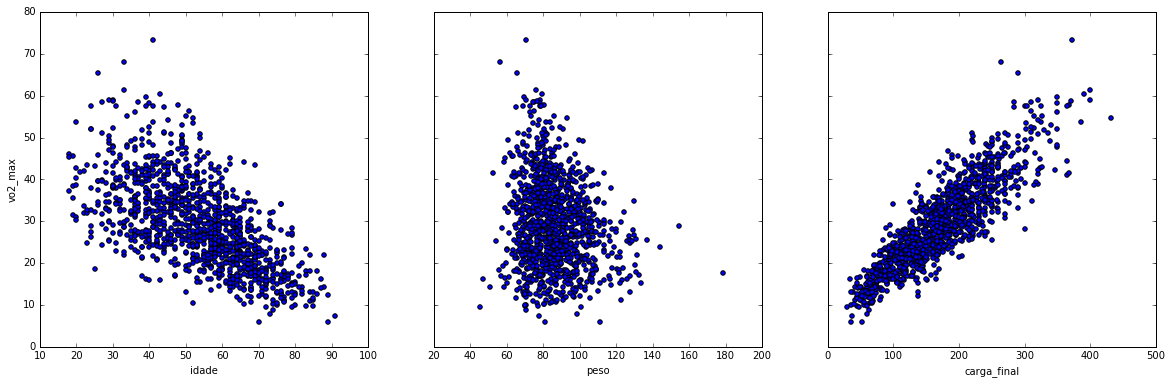

In [4]:
fig, axs = plt.subplots(1,3, sharey=True)
df.plot(kind='scatter',x='idade',y='vo2_max',ax=axs[0],figsize=(20,6))
df.plot(kind='scatter',x='peso',y='vo2_max',ax=axs[1])
df.plot(kind='scatter',x='carga_final',y='vo2_max',ax=axs[2])

# QUESTION 1

## ITEM 1.1

> Polynomials of different degrees fitted using least-squares, trying to predict y (`vo2_max`) in terms of x (`carga_final`).

> The parameters for the curves are the number of degrees in the polynomial and sigma, the standard deviation of the error, which is assumed gaussian

/home/felipe/statistical-learning/venv/lib/python3.4/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


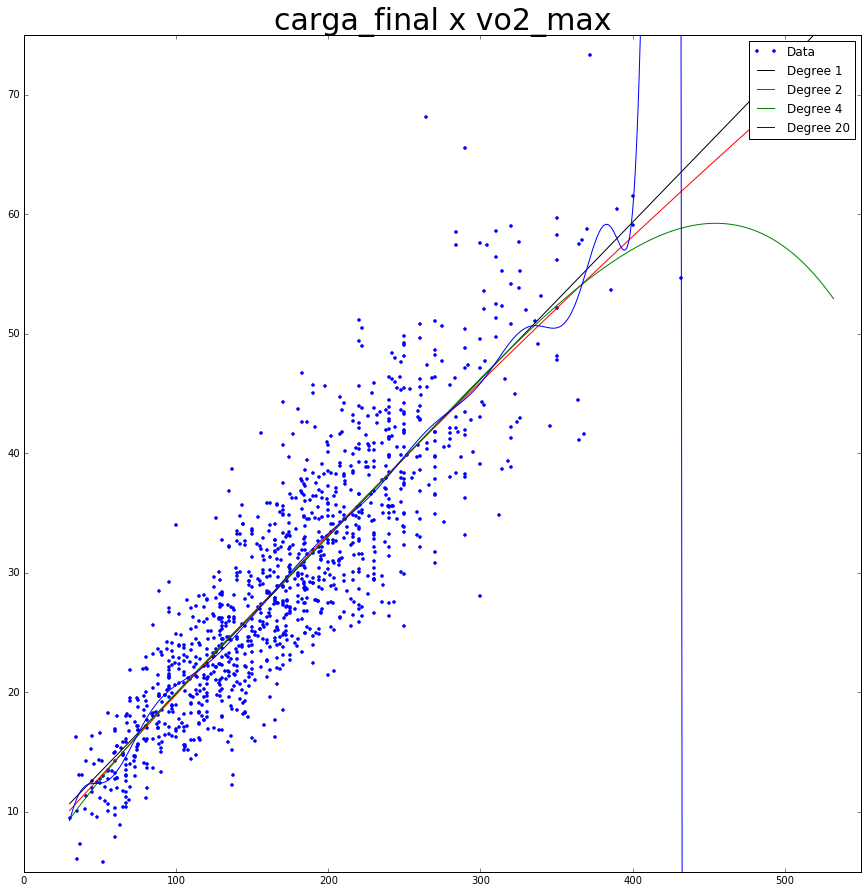

In [5]:
x = df['carga_final'].values
y = df['vo2_max'].values

plt.clf()

# degree 1
params_1 = np.polyfit(x,y,deg=1)

# degree 2
params_2 = np.polyfit(x,y,deg=2)

# degree 4
params_4 = np.polyfit(x,y,deg=4)

# degree 20
params_20 = np.polyfit(x,y,deg=20)

p1 = np.poly1d(params_1) 
p2 = np.poly1d(params_2)
p4 = np.poly1d(params_4)
p20 = np.poly1d(params_20)
plt.figure(figsize=(15,15))

# error itself is a gaussian RV
def gen_error(mu,sigma,domain):
    return(np.random.normal(mu,sigma,len(domain)))

# this is the domain dor the predictions
xs = np.linspace(x.min(),x.max()+100,len(x))

plt.title("carga_final x vo2_max",{'fontsize':30})
plt.plot(x,y,'.',label="Data")
plt.plot(xs,p1(xs),'k-', label='Degree 1')
plt.plot(xs,p2(xs),'r-', label='Degree 2')
plt.plot(xs,p4(xs),'g-', label='Degree 4')
plt.plot(xs,p20(xs),'b-', label='Degree 20')
plt.ylim(5,75)
plt.xlim(0,550)
_ = plt.legend()

**Calculating the Negative Log Likelihood**

The negative log likelihood (NLL) of the parameters are as follows:

$$NLL(\theta) = \sum_{i=1}^{N} \log{\Pr(y_i\vert x_i,\theta)} $$

So, in other words, for each observed point $y_i$ in the data set, I can imagine there is a gaussian distribution with mean $\widehat{y_i}$ (the approximation of $y_i$ obtained by fitting the polynomial) and standard deviation $\sigma$. 

So we can calculate the likelihood that the observed point is explained by our model plus or minus a given error.

In [6]:
xs = np.linspace(x.min(),x.max(),len(x))

SIGMA = 1000

# DEGREE 1

# degree 1, sigma 1000
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

SIGMA = 100

# degree 1, sigma 100
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

SIGMA = 10

# degree 1, sigma 10
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

# DEGREE 2

SIGMA = 1000

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

SIGMA = 100

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

SIGMA = 10

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

# DEGREE 4

SIGMA = 1000

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

SIGMA = 100

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

SIGMA = 10

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

# DEGREE 20

SIGMA = 1000

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))

SIGMA = 100

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 20:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))

SIGMA = 10

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 20:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))


Degree 1: 
 w     = [ 0.13146104  6.75017039] 
 SIGMA = 1000
 NLL   = 9141.92 

Degree 1: 
 w     = [ 0.13146104  6.75017039] 
 SIGMA = 100
 NLL   = 6486.70 

Degree 1: 
 w     = [ 0.13146104  6.75017039] 
 SIGMA = 10
 NLL   = 7216.35 

Degree 2:  SIGMA = 1000, NLL   = 9141.91 

Degree 2:  SIGMA = 100, NLL   = 6485.70 

Degree 2:  SIGMA = 10, NLL   = 7116.97 

Degree 4:  SIGMA = 1000, NLL   = 9141.91 

Degree 4:  SIGMA = 100, NLL   = 6485.04 

Degree 4:  SIGMA = 10, NLL   = 7050.75 

Degree 2:  SIGMA = 1000, NLL   = 9143.29 

Degree 20:  SIGMA = 100, NLL   = 6623.15 

Degree 20:  SIGMA = 10, NLL   = 20861.81 



## ITEM 1.2

> Similarly, here we have polynomials of different degrees fitted using least-squares, but now trying to predict y (`vo2_max`) in terms of x (`idade`)

/home/felipe/statistical-learning/venv/lib/python3.4/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


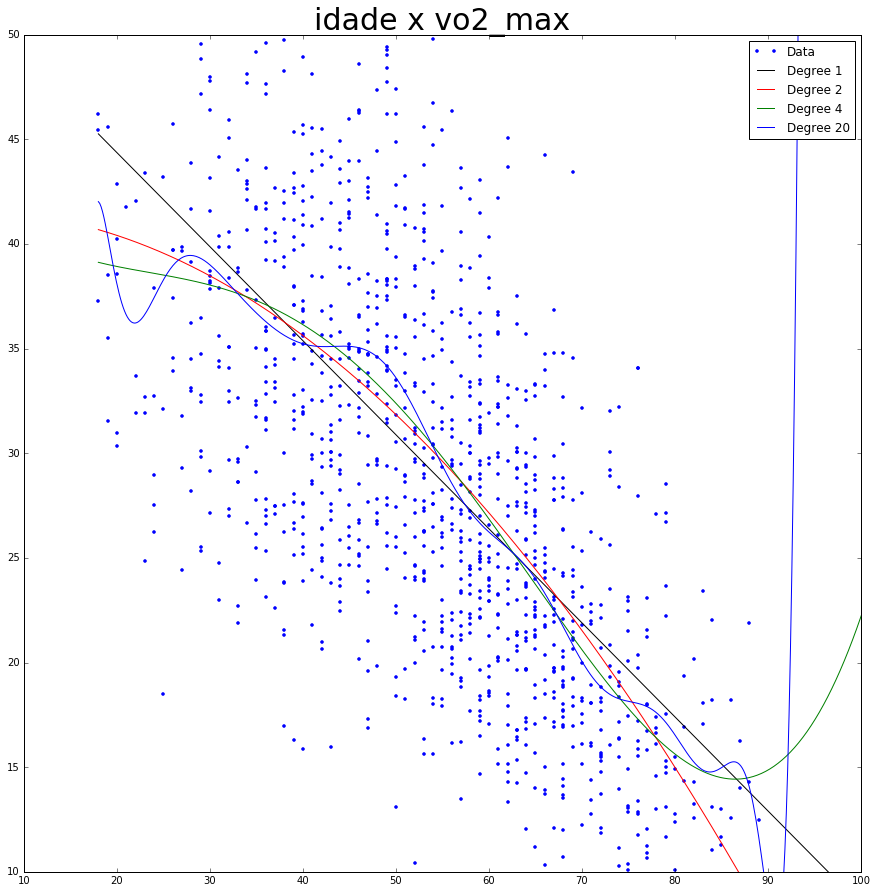

In [7]:
x = df['idade'].values
y = df['vo2_max'].values

plt.clf()

params_1 = np.polyfit(x,y,deg=1)
params_2 = np.polyfit(x,y,deg=2)
params_4 = np.polyfit(x,y,deg=4)
params_20 = np.polyfit(x,y,deg=20)

p1 = np.poly1d(params_1) 
p2 = np.poly1d(params_2)
p4 = np.poly1d(params_4)
p20 = np.poly1d(params_20)
plt.figure(figsize=(15,15))

xs = np.linspace(x.min(),x.max()+100,len(x))

plt.title("idade x vo2_max",{'fontsize':30})
plt.plot(x,y,'.',label="Data")

plt.plot(xs,p1(xs),'k-', label='Degree 1')
plt.plot(xs,p2(xs),'r-', label='Degree 2')
plt.plot(xs,p4(xs),'g-', label='Degree 4')
plt.plot(xs,p20(xs),'b-', label='Degree 20')
plt.ylim(10,50)
plt.xlim(10,100)
_ = plt.legend()

> In order to calculate the Negative Log Likelihood (NLL), we'll follow the same approach as in Item 1.1

In [8]:
xs = np.linspace(x.min(),x.max(),len(x))

SIGMA = 1000

# DEGREE 1

# degree 1, sigma 1000
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

SIGMA = 100

# degree 1, sigma 100
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

SIGMA = 10

# degree 1, sigma 10
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

# DEGREE 2

SIGMA = 1000

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

SIGMA = 100

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

SIGMA = 10

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

# DEGREE 4

SIGMA = 1000

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

SIGMA = 100

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

SIGMA = 10

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

# DEGREE 20

SIGMA = 1000

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))

SIGMA = 100

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 20:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))

SIGMA = 10

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 20:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))


Degree 1: 
 w     = [ -0.44938877  53.35517048] 
 SIGMA = 1000
 NLL   = 9141.63 

Degree 1: 
 w     = [ -0.44938877  53.35517048] 
 SIGMA = 100
 NLL   = 6457.03 

Degree 1: 
 w     = [ -0.44938877  53.35517048] 
 SIGMA = 10
 NLL   = 4249.81 

Degree 2:  SIGMA = 1000, NLL   = 9141.63 

Degree 2:  SIGMA = 100, NLL   = 6457.65 

Degree 2:  SIGMA = 10, NLL   = 4311.49 

Degree 4:  SIGMA = 1000, NLL   = 9141.63 

Degree 4:  SIGMA = 100, NLL   = 6457.26 

Degree 4:  SIGMA = 10, NLL   = 4272.93 

Degree 2:  SIGMA = 1000, NLL   = 9141.63 

Degree 20:  SIGMA = 100, NLL   = 6457.38 

Degree 20:  SIGMA = 10, NLL   = 4284.48 



# QUESTION 2

> For this question, we will attempt to create a model based off variables `idade` (x) and `carga_final` (y), in order to try and approximate the values for the target variable `vo2_max` (z).

In [9]:
from mpl_toolkits.mplot3d import Axes3D

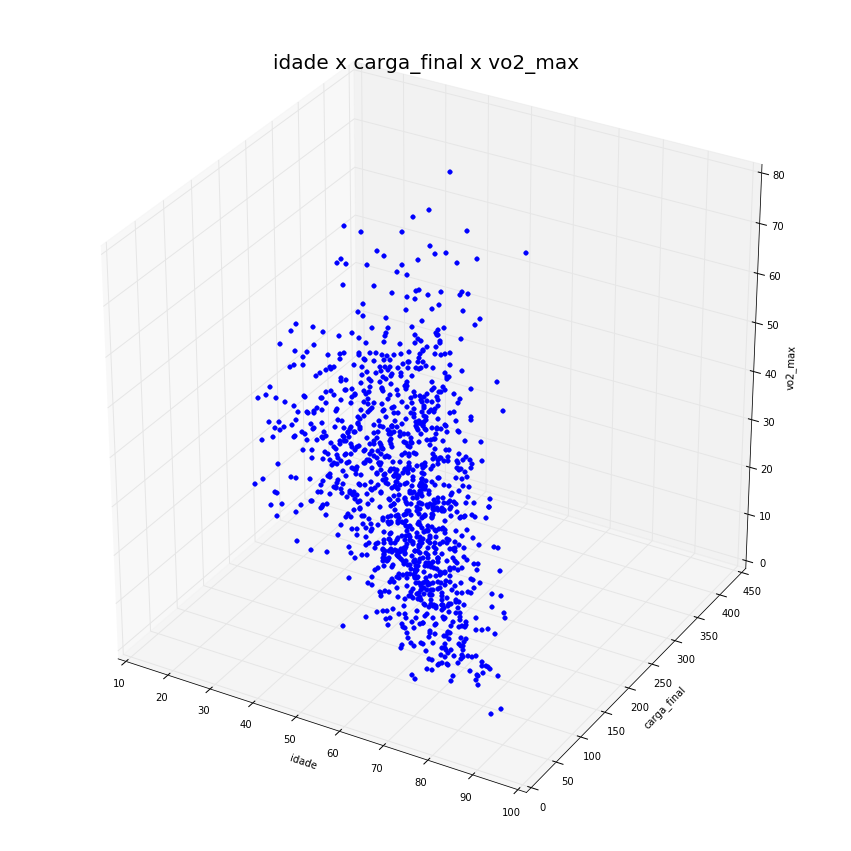

In [10]:
# our data
x = df["idade"]
y = df["carga_final"]
z = df["vo2_max"]

# plotting the points as a scatter plot
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.plot(x,y,z,'.',ms=9.0, label="Data")
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")
plt.title("idade x carga_final x vo2_max",{'fontsize':20})

> As an example, let's use a simple 1-degree surface (a plane) to try and fit the data

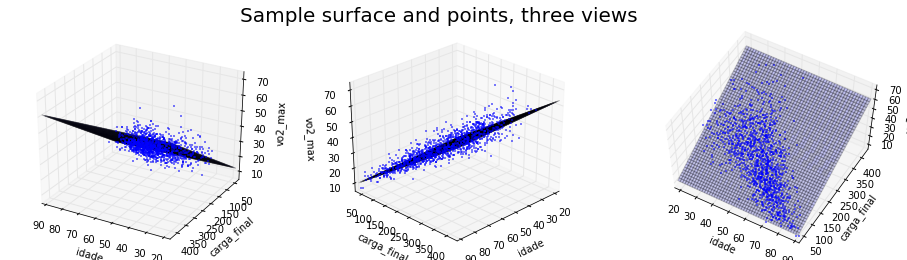

In [11]:
from scipy.optimize import curve_fit
from scipy.linalg import lstsq
   
plt.clf()

# we will use these as a 'mesh' to plot z-values
domain_x = np.linspace(x.min(),x.max(),50)
domain_y = np.linspace(y.min(),y.max(),50)

# the center of our 2-d domain
zero_x = (x.max()+x.min()) / 2
zero_y = (y.max()+y.min()) / 2

X,Y = np.meshgrid(domain_x, domain_y)

# best-fit linear plane
A = np.c_[x, y, np.ones(len(x))]
C,_,_,_ = lstsq(A, z)    # coefficients
    
# evaluate it on grid
Z = C[0]*X + C[1]*Y + C[2]

# # fig = plt.figure(figsize=(15,15))
fig = plt.figure(figsize=(16,4))

# first plot

ax = fig.add_subplot(1,3,1,projection='3d')
ax.plot(x,y,z,'.',ms=2.0, label="Data")
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,alpha=0.2)
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")
ax.axis('equal')
ax.axis('tight')

ax.view_init(30,120)

# second plot

ax = fig.add_subplot(1,3,2,projection='3d')
ax.plot(x,y,z,'.',ms=2.0, label="Data")
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,alpha=0.2)
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")
ax.axis('equal')
ax.axis('tight')

ax.view_init(azim=45)

plt.suptitle("Sample surface and points, three views",fontsize=20)
# # third plot

ax = fig.add_subplot(1,3,3,projection='3d')
ax.plot(x,y,z,'.',ms=2.0, label="Data")
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,alpha=0.2)
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")
ax.axis('equal')
ax.axis('tight')

ax.view_init(elev=60)


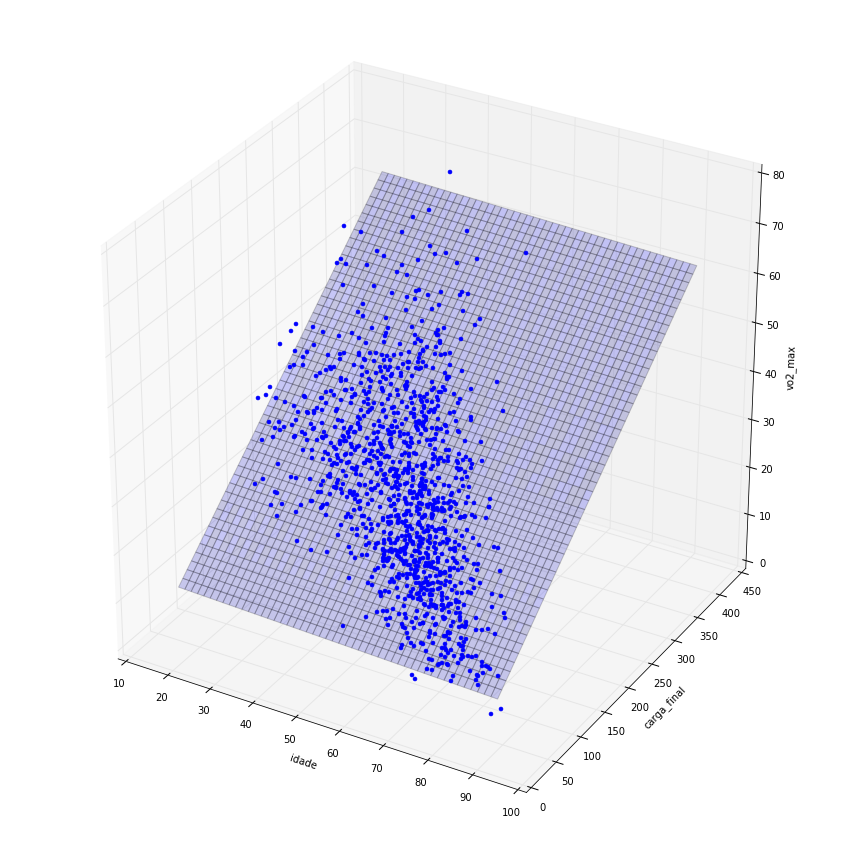

In [12]:
from scipy.stats import multivariate_normal

# degree = 1 cov = [[1,0][0,1]]
cov = [[1,0],[0,1]]

# - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

# mesh
domain_x = np.linspace(x.min(),x.max(),50)
domain_y = np.linspace(y.min(),y.max(),50)

X,Y = np.meshgrid(domain_x, domain_y)
A = np.c_[x, y, np.ones(len(x))]
# C are the coefficients
C,_,_,_ = lstsq(A, z)
    
# z = ax + by +c is the function for the surface
Z = C[0]*X + C[1]*Y + C[2]

fig = plt.figure(figsize=(15,15))

ax = fig.gca(projection='3d')
ax.plot(x,y,z,'.',ms=8.0, label="Data")
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,alpha=0.2)
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")

Now let's calculate the NLL for a couple of combinations of the value of the covariance matrix of the multivariate gaussian that represents the error.

We will calculate the likelihood of the data points having been generated by the given surface while allowing for an error that may fall within a (bivariate) gaussian distribution with center in the estimated surface and covariance matrix given the `cov` parameter.

> When a **single scalar** `s` is given as the covariance value for function `multivariate_normal.logpdf()`, python converts it to an identity matrix where every non-zero elemento equals `s`

In [13]:
# from the previous step, we have

xs = np.linspace(0, x.max(), len(x), endpoint=False)
ys = np.linspace(0, y.max(), len(y), endpoint=False)
zs = z.values # original z-values for the data

X,Y = np.meshgrid(xs, ys)
A = np.c_[xs, ys, np.ones(len(xs))]
# C are the coefficients
C,_,_,_ = lstsq(A, zs)
    
# z = ax + by +c is the function for the surface fitted
Z_HAT = C[0]*X + C[1]*Y + C[2]

estimate_z = np.vectorize(lambda x,y: C[0]*x + C[1]*y + C[2])


# degree 1, cov=1

# a scalar value represents an identity matrix with entries equal to that number
COV = 1

nll_1 = -np.sum(multivariate_normal.logpdf(zs,mean=estimate_z(xs,ys), cov=COV))

print("Degree 1: \n w     = {0} \n COVARIANCE(SCALAR) = {1}\n NLL   = {2:.2f} \n".format(
        C,
        COV,
        nll_1))

# degree 1, cov=10

# a scalar value represents an identity matrix with entries equal to that number
COV = 10

nll_1 = -np.sum(multivariate_normal.logpdf(zs,mean=estimate_z(xs,ys), cov=COV))

print("Degree 1: \n w     = {0} \n COVARIANCE(SCALAR) = {1}\n NLL   = {2:.2f} \n".format(
        C,
        COV,
        nll_1))


# degree 1, cov=100

# a scalar value represents an identity matrix with entries equal to that number
COV = 100

nll_1 = -np.sum(multivariate_normal.logpdf(zs,mean=estimate_z(xs,ys), cov=COV))

print("Degree 1: \n w     = {0} \n COVARIANCE(SCALAR) = {1}\n NLL   = {2:.2f} \n".format(
        C,
        COV,
        nll_1))


# degree 1, cov=1000

# a scalar value represents an identity matrix with entries equal to that number
COV = 1000

nll_1 = -np.sum(multivariate_normal.logpdf(zs,mean=estimate_z(xs,ys), cov=COV))

print("Degree 1: \n w     = {0} \n COVARIANCE(SCALAR) = {1}\n NLL   = {2:.2f} \n".format(
        C,
        COV,
        nll_1))


Degree 1: 
 w     = [ -9.97091909e-03  -4.73344731e-02   4.00524463e+01] 
 COVARIANCE(SCALAR) = 1
 NLL   = 43211.64 

Degree 1: 
 w     = [ -9.97091909e-03  -4.73344731e-02   4.00524463e+01] 
 COVARIANCE(SCALAR) = 10
 NLL   = 6631.86 

Degree 1: 
 w     = [ -9.97091909e-03  -4.73344731e-02   4.00524463e+01] 
 COVARIANCE(SCALAR) = 100
 NLL   = 4184.12 

Degree 1: 
 w     = [ -9.97091909e-03  -4.73344731e-02   4.00524463e+01] 
 COVARIANCE(SCALAR) = 1000
 NLL   = 5149.59 



# QUESTION 3